# Task 1 : Prediction Using Decision Tree Algorithm 

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# Reading the Data

In [3]:
df = pd.read_csv('Iris.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Checking the value counts of species

In [7]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

# Checking Categorical values into numerical values

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])

In [9]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [10]:
df['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

# Training & Testing the Data

In [11]:
X=df.drop(['Id','Species'],axis=1)
y=df['Species']

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=40)

# Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()

In [14]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

# Predictions & Evaluation

In [15]:
predictions = dtree.predict(X_test)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [17]:
print(confusion_matrix(y_test,predictions))

[[16  0  0]
 [ 0 14  0]
 [ 0  0 15]]


In [18]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [19]:
print(accuracy_score(y_test,predictions)*100,"%")

100.0 %


# Tree Visualization

[Text(223.2, 697.62, 'X[3] <= 0.8\ngini = 0.666\nsamples = 105\nvalue = [34, 36, 35]'),
 Text(167.39999999999998, 570.78, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(279.0, 570.78, 'X[2] <= 4.95\ngini = 0.5\nsamples = 71\nvalue = [0, 36, 35]'),
 Text(111.6, 443.94, 'X[3] <= 1.65\ngini = 0.149\nsamples = 37\nvalue = [0, 34, 3]'),
 Text(55.8, 317.1, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(167.39999999999998, 317.1, 'X[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(111.6, 190.26, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(223.2, 190.26, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(446.4, 443.94, 'X[3] <= 1.75\ngini = 0.111\nsamples = 34\nvalue = [0, 2, 32]'),
 Text(390.59999999999997, 317.1, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(334.79999999999995, 190.26, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(446.4, 190.26, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(390.59

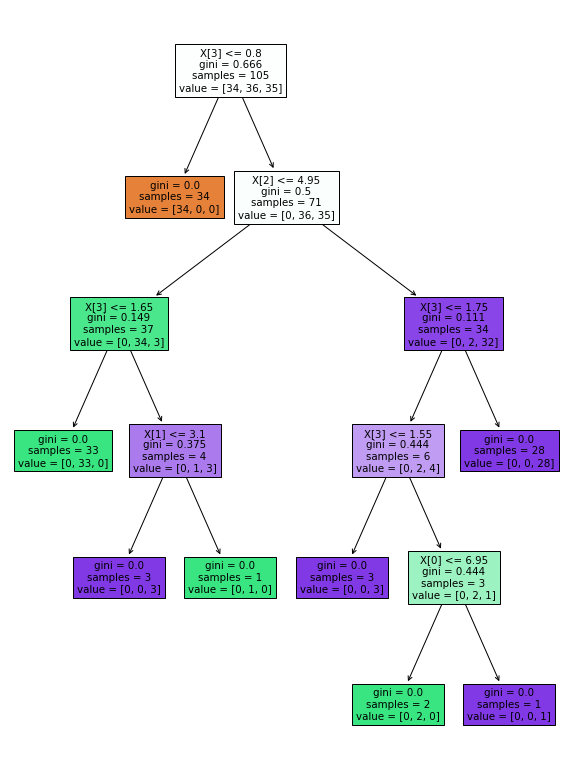

In [20]:
from sklearn import tree
plt.figure(figsize=(10,14))
tree.plot_tree(dtree,filled=True)

# Thank You !